In [1]:
#importing pandas
import pandas as pd
from pandas.api.types import CategoricalDtype
#impoting numpy sklearn seaborn matoplot scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats

In [2]:
#Read DataSet off of computer
df = pd.read_csv('C:\\Users\jefft\\Desktop\\medical_raw_data.csv', index_col=0)

In [3]:
#basic information about dataset
 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

In [4]:
#Visually Looking at data frame
pd.set_option("display.max_columns", None)
df


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491e

In [5]:
#Detection of Missing Data
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

In [6]:
# Check that the placeholder variable has 10,000 outcomes and is unique.
df.CaseOrder.value_counts().count()

10000

In [7]:
# Check if Customer_id is distinct (there ought to be 10,000 results).
df.Customer_id.value_counts().count()

10000

In [8]:
 
# Check that UID is distinct (there should be 10,000 results).
df.UID.value_counts().count()

10000

In [9]:
# Verify if the values are appropriate for the datatype categorical.
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [10]:

# Verify the entire value range and decide if the datatype is appropriate for category
df.Timezone.value_counts()

Timezone
America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak    

In [11]:

# Check that the data exists and that it is appropriate for the datatype Int64.
df.Children.describe()


count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [12]:
# Check that the data exists and that it is appropriate for the datatype Int64.
df.Age.describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [13]:
# Verify if the values are appropriate for the datatype categorical.
df.Education.value_counts()

Education
Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: count, dtype: int64

In [14]:
# Verify if the values are appropriate for the datatype categorical.
df.Employment.value_counts()

Employment
Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: count, dtype: int64

In [15]:
# Confirm the existence of data within reasonable limitations
df.Income.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [16]:
# Verify if the values are appropriate for the datatype categorical.
df.Marital.value_counts()


Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [17]:
# Verify if the values are appropriate for the datatype categorical.
df.Gender.value_counts()

Gender
Female                  5018
Male                    4768
Prefer not to answer     214
Name: count, dtype: int64

In [18]:
# Verify that the values are appropriate for the datatype boolean.
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [19]:
# Verify data exists within reasonable bounds
df.VitD_levels.describe()

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

In [20]:
df.VitD_levels.nlargest(n=20)

1964    53.019124
1307    52.757599
7158    52.370764
7231    52.271584
2616    52.156112
3474    52.124137
7528    52.117337
581     52.063590
1799    51.671571
8682    51.659892
448     51.430034
2747    51.305309
6939    51.216965
9908    51.202138
5044    51.030046
7761    50.958467
8358    50.927637
2157    50.915519
3387    50.888076
5596    50.884049
Name: VitD_levels, dtype: float64

In [21]:
# Verify data exists within reasonable bounds
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [22]:
# Verify data exists within reasonable bounds
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [23]:
# Verify data exists within reasonable bounds
df.VitD_supp.describe()


count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: VitD_supp, dtype: float64

In [24]:
 
# Verify that the values are appropriate for the datatype boolean.
df.Soft_drink.value_counts()

Soft_drink
No     5589
Yes    1944
Name: count, dtype: int64

In [25]:
# Verify if the values are appropriate for the datatype categorical.
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [26]:
 
# Verify that the values are appropriate for the datatype boolean.
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [27]:
 
# Verify that the values are appropriate for the datatype boolean.
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [28]:
# Verify if the values are appropriate for the datatype categorical.
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [29]:
# Verify data exists to be sensibly translated into datatype boolean
df.Overweight.value_counts()

Overweight
1.0    6395
0.0    2623
Name: count, dtype: int64

In [30]:
 
# Verify that the values are appropriate for the datatype boolean.
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [31]:
 
# Verify that the values are appropriate for the datatype boolean.
df.Diabetes.value_counts()


Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [32]:
 
# Verify that the values are appropriate for the datatype boolean.
df.Hyperlipidemia.value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [33]:
 
# Verify that the values are appropriate for the datatype boolean.
df.BackPain.value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [34]:
# Verify data exists to be sensibly translated into datatype boolean
df.Anxiety.value_counts()

Anxiety
0.0    6110
1.0    2906
Name: count, dtype: int64

In [35]:
 
# Verify that the values are appropriate for the datatype boolean.
df.Allergic_rhinitis.value_counts()

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [36]:
 
# Verify that the values are appropriate for the datatype boolean.
df.Asthma.value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [37]:
# Verify if the values are appropriate for the datatype categorical.
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [38]:
# Examine data format
df.Initial_days.value_counts()

Initial_days
10.585770    1
64.630142    1
48.772686    1
67.036508    1
63.334689    1
            ..
9.216747     1
1.021594     1
10.261690    1
17.170461    1
70.850592    1
Name: count, Length: 8944, dtype: int64

In [39]:

# Verify data exists within reasonable bounds, is reasonable to be rounded
df.TotalCharge.describe()

count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: TotalCharge, dtype: float64

In [40]:

# Verify data exists within reasonable bounds, is reasonable to be rounded
df.Additional_charges.describe()

count    10000.000000
mean     12934.528586
std       6542.601544
min       3125.702716
25%       7986.487642
50%      11573.979365
75%      15626.491033
max      30566.073130
Name: Additional_charges, dtype: float64

In [41]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype.
df.Item1.value_counts()

Item1
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: count, dtype: int64

In [42]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype.
df.Item2.value_counts()


Item2
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: count, dtype: int64

In [43]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype.
df.Item3.value_counts()

Item3
4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: count, dtype: int64

In [44]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype.
df.Item4.value_counts()

Item4
3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: count, dtype: int64

In [45]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype.
df.Item5.value_counts()

Item5
4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: count, dtype: int64

In [46]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype.
df.Item6.value_counts()

Item6
4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: count, dtype: int64

In [47]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype.
df.Item7.value_counts()

Item7
4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: count, dtype: int64

In [48]:
# Confirm that the data fits inside the 1–8 limit and is appropriate for storage as an ordered categorical datatype. 
df.Item8.value_counts()

Item8
3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: count, dtype: int64

In [49]:
# Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert column to category from string
df["Area"] = df["Area"].astype("category")

In [50]:
# Convert column to category from string
df["Education"] = df["Education"].astype("category")
# Convert column to category from string
df["Employment"] = df["Employment"].astype("category")
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")

In [51]:

# Convert column to category from string
df["Timezone"] = df["Timezone"].astype("category")
# Convert column from float to int, use type Int64 to handle NaN values (Int64 supports NaN, int64 does not)
df["Children"] = df["Children"].astype("Int64")
# Convert column from float to int, use type Int64 to handle NaN values (Int64 supports NaN, int64 does not)
df["Age"] = df["Age"].astype("Int64")

In [52]:
df.Gender.replace({
    "Female" : "Female",
    "Male" : "Male",
    "Prefer not to answer" : "NonBinary"  
}, inplace=True)
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].astype("bool")
#Reformat the vitamin D level column from six to three decimal points.
df["VitD_levels"] = df.VitD_levels.round(3)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].astype("bool")
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].astype("bool")
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].astype("bool")
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to boolean from float
df["Overweight"] = df["Overweight"].astype("bool")
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].astype("bool")
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].astype("bool")
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].astype("bool")
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].astype("bool")
# Convert column to boolean from float
df["Anxiety"] = df["Anxiety"].astype("bool")
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].astype("bool")
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].astype("bool")
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].astype("bool")
# Convert column to category from string
df["Services"] = df["Services"].astype("category")
#Since Initial_days only includes hospital stays longer than one day, it is reasonable to believe that NaNs indicate 0 days.
df.Initial_days.fillna(0, inplace=True)
# Convert days in hospital from float to integer
df["Initial_days"] = df["Initial_days"].astype("int64")
# Reformat currency column from six to two decimal places.
df["TotalCharge"] = df.TotalCharge.round(2)
# Reformat column representing currency in USD to 2 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(2)
#For the survey response columns, created an ordered categorical datatype structure ("1" > "2" >... > "7" > "8").
survey_scores = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item1"] = df["Item1"].map(str)
# Convert the strings datatype to the newly generated survey_scores datatype. 
df["Item1"] = df["Item1"].astype(survey_scores)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item2"] = df["Item2"].map(str)
# Convert the strings datatype to the newly generated survey_scores datatype. 
df["Item2"] = df["Item2"].astype(survey_scores)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item3"] = df["Item3"].map(str)
#Convert the strings datatype to the newly generated survey_scores datatype. 
df["Item3"] = df["Item3"].astype(survey_scores)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item4"] = df["Item4"].map(str)
#Convert the strings datatype to the newly generated survey_scores datatype. 
df["Item4"] = df["Item4"].astype(survey_scores)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item5"] = df["Item5"].map(str)
# Convert the strings datatype to the newly generated survey_scores datatype. 
df["Item5"] = df["Item5"].astype(survey_scores)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item6"] = df["Item6"].map(str)
# Convert the strings datatype to the newly generated survey_scores datatype. 
df["Item6"] = df["Item6"].astype(survey_scores)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item7"] = df["Item7"].map(str)
# Convert the strings datatype to the newly generated survey_scores datatype.  
df["Item7"] = df["Item7"].astype(survey_scores)
# Instead, map integers to strings (without this, the conversion from int to ordered categorical will behave strangely).
df["Item8"] = df["Item8"].map(str)
# Convert the strings datatype to the newly generated survey_scores datatype. 
df["Item8"] = df["Item8"].astype(survey_scores)

In [53]:
# erase all rows containing null values (these exist only in Children, Age, and Income)
df.dropna(inplace=True)

In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4221 entries, 1 to 9999
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CaseOrder           4221 non-null   int64   
 1   Customer_id         4221 non-null   object  
 2   Interaction         4221 non-null   object  
 3   UID                 4221 non-null   object  
 4   City                4221 non-null   object  
 5   State               4221 non-null   object  
 6   County              4221 non-null   object  
 7   Zip                 4221 non-null   object  
 8   Lat                 4221 non-null   float64 
 9   Lng                 4221 non-null   float64 
 10  Population          4221 non-null   int64   
 11  Area                4221 non-null   category
 12  Timezone            4221 non-null   category
 13  Job                 4221 non-null   object  
 14  Children            4221 non-null   Int64   
 15  Age                 4221 non-null   Int64  

In [55]:

#PCA [(Intext citation Middleton,n.d)]
##gathering variables for pca in new df
df_pca206 = df[['Lat', "Lng", "Population", "Children", "Age", "Income", "VitD_levels", "Doc_visits", "Full_meals_eaten", "VitD_supp", "TotalCharge", "Additional_charges"]]

In [56]:
#viewing df for pca[(Intext citation Middleton,n.d)]
df_pca206

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,TotalCharge,Additional_charges
1,34.34960,-86.72508,2951,1,53,86575.93,17.802,6,0,0,3191.05,17939.40
2,30.84513,-85.22907,11303,3,51,46805.99,18.995,4,2,1,4214.91,17613.00
3,43.54321,-96.63772,17125,3,53,14370.14,17.416,4,1,0,2177.59,17505.19
4,43.89744,-93.51479,2162,0,78,39741.49,17.420,4,1,0,2465.12,12993.44
7,41.67511,-81.05788,2558,0,50,10456.05,14.348,6,0,0,3533.29,16815.51
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,39.97310,-82.96898,8368,3,50,21989.44,17.757,3,2,0,8703.16,17367.97
9994,41.00669,-73.94259,5412,1,83,15654.69,20.231,4,1,1,6850.73,27882.08
9995,27.88942,-80.73347,7908,6,69,39797.05,17.229,4,0,2,5857.56,12045.86
9997,39.43609,-74.87302,1251,4,87,14983.02,18.452,5,0,0,7851.52,28507.15


In [57]:
#normalizing columns[(Intext citation Middleton,n.d)]
df_pca206_normalized = (df_pca206-df_pca206.mean())/df_pca206.std()

In [58]:
#DF_pca206 printed[(Intext citation Middleton,n.d)]
print(df_pca206_normalized)

           Lat       Lng  Population  Children       Age    Income  \
1    -0.824327  0.296402   -0.476423  -0.51295 -0.018564  1.600921   
2    -1.471592  0.395581    0.091575  0.417902 -0.115966  0.212369   
3     0.873707 -0.360766    0.487514  0.417902 -0.018564 -0.920116   
4     0.939132 -0.153728   -0.530081 -0.978376  1.198959 -0.034285   
7     0.528674  0.672114   -0.503150 -0.978376 -0.164667 -1.056775   
...        ...       ...         ...       ...       ...       ...   
9993  0.214318  0.545416   -0.108027  0.417902 -0.164667 -0.654091   
9994  0.405219  1.143829   -0.309057  -0.51295  1.442464 -0.875267   
9995 -2.017503  0.693621   -0.139310   1.81418  0.760651 -0.032346   
9997  0.115133  1.082145   -0.592036  0.883328  1.637267 -0.898718   
9999  0.977198 -0.717319   -0.658683  0.417902 -0.505574 -0.384799   

      VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp  TotalCharge  \
1       -0.234012    0.938278         -0.986491  -0.629438    -0.786808   
2       -

In [59]:
#setting the size of the PCA [(Intext citation Middleton,n.d)]
pca = PCA(n_components=df_pca206_normalized.shape[1])

In [60]:
##seeing pca components[(Intext citation Middleton,n.d)]
pca.fit(df_pca206_normalized)

PCA(n_components=12)

In [61]:
# This allows us to print the data within the PCA, if desired, in a dataframe[(Intext citation Middleton,n.d)]
pca_printable = pd.DataFrame(pca.transform(df_pca206_normalized), columns=["PC1", "PC2", "PC3", "PC4", "PC5", 
                                                                 "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",])


In [62]:
# Generate dateframe of each component of the PCA and its loading[(Intext citation Middleton,n.d)]
pca_loadings = pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", 
                                                          "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",],
                            index=df_pca206_normalized.columns)

In [63]:
# Print out the component loadings (correlation coefficients of each Principal Component)[(Intext citation Middleton,n.d)]
pca_loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.062814,-0.000688,0.687348,0.021340,0.032944,-0.033296,-0.156478,-0.006928,0.042913,-0.703167,0.011000,-0.004156
Lng,0.010358,0.006487,-0.419367,-0.444121,-0.218569,-0.032585,-0.221934,0.399670,-0.443270,-0.414916,-0.015589,0.005102
Population,0.042897,0.025393,-0.553878,0.307404,-0.010672,0.034789,0.175244,-0.428353,0.266099,-0.556296,0.021010,-0.000833
Children,-0.003669,-0.000107,-0.028403,0.309409,0.395286,0.714035,-0.199047,-0.029337,-0.443237,-0.015610,0.012847,0.001277
Age,0.456055,-0.537622,0.017513,-0.028016,-0.008159,0.010647,-0.036883,0.008336,0.020780,-0.003648,0.678377,-0.199081
Income,0.016829,-0.005540,-0.014378,0.585335,-0.036915,-0.121939,0.396592,0.687717,-0.039710,-0.090818,0.023732,-0.001424
VitD_levels,0.531693,0.463293,0.047887,-0.002685,-0.014075,0.002157,-0.033757,0.008306,0.003781,0.004882,0.204548,0.676071
Doc_visits,0.001344,-0.027501,0.061695,0.458720,-0.500939,-0.313835,-0.287843,-0.320505,-0.489300,0.102839,-0.003111,-0.001686
Full_meals_eaten,0.039938,0.006375,0.187552,-0.229465,-0.355234,0.300322,0.736707,-0.216178,-0.320664,-0.039315,0.002101,-0.017445
VitD_supp,0.043627,-0.023401,-0.017893,-0.073240,0.644877,-0.531254,0.262090,-0.181874,-0.434859,-0.051386,-0.000124,0.015984


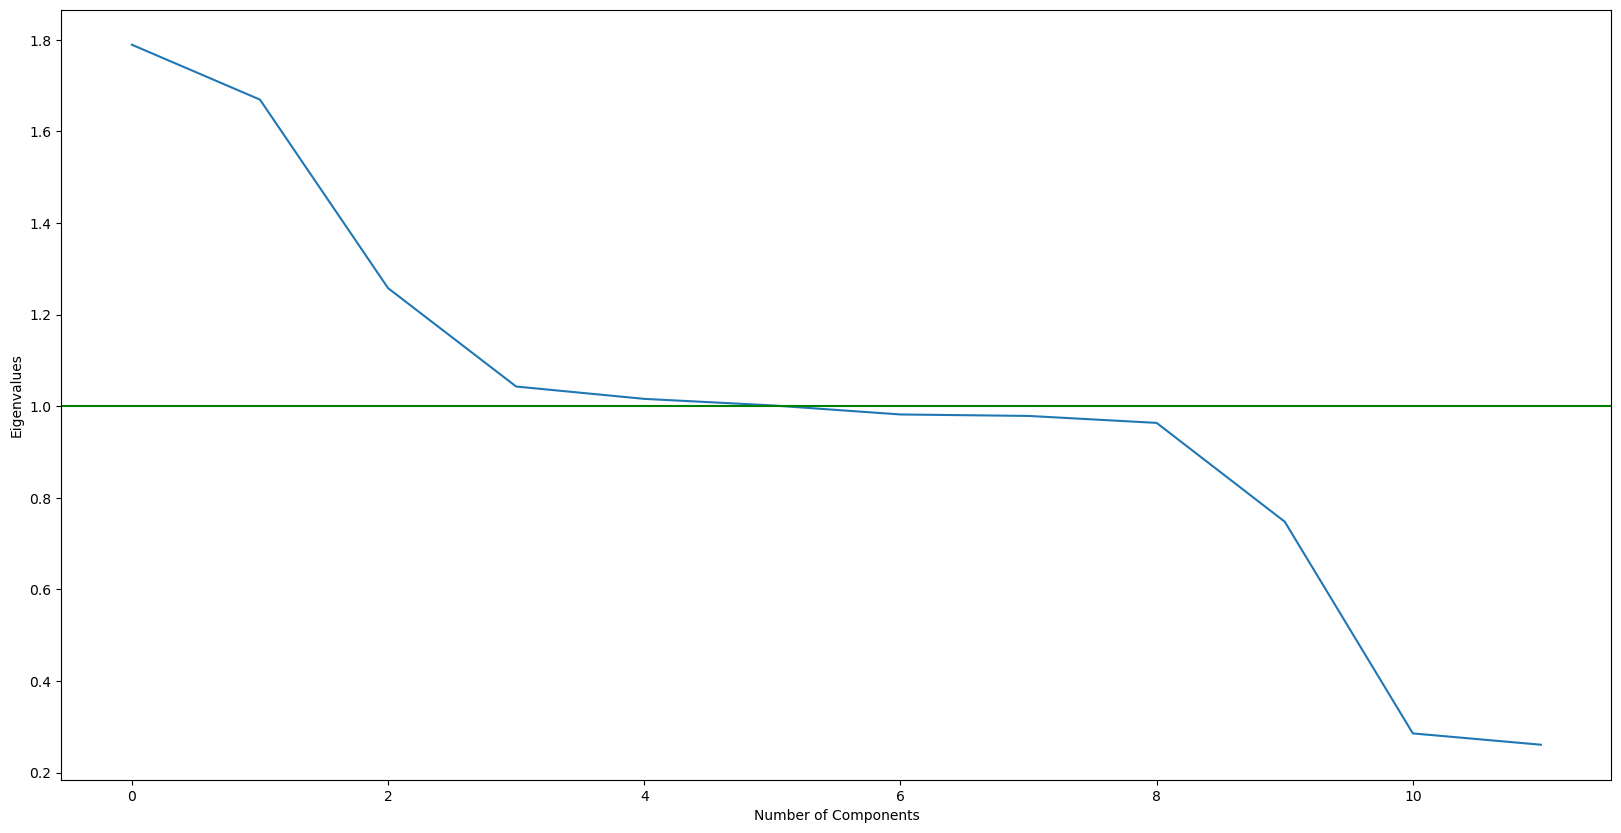

In [64]:
#PCA visualization[(Intext citation Middleton,n.d)]
covariance_matrix = np.dot(df_pca206_normalized.T, df_pca206_normalized) / df_pca206.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]

plt.figure(figsize = [20,10])
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='green')
plt.show()

In [65]:
#eigenvalues[(Intext citation Middleton,n.d)]
eigenvalues
#Principal components are PC1, PC2, PC3, PC4, PC5, and PC6. = above 1
#7-12 below 1

[1.7892792111889972,
 1.6694459015562537,
 1.2578795185044482,
 1.0430796050370017,
 1.0161344516587294,
 1.00184749366799,
 0.9820777908007654,
 0.9788883360026972,
 0.963687201539307,
 0.7479611989074537,
 0.28579313467475864,
 0.2610832282455028]

In [66]:

# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
df.to_csv('output206.csv', index=False)

df.head(20)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,True,17.802,6,0,0,True,Emergency Admission,True,True,Medium,False,True,True,True,True,True,True,True,True,Blood Work,10,3191.05,17939.40,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,True,18.995,4,2,1,True,Emergency Admission,True,True,High,True,True,True,True,True,True,True,True,True,Intravenous,15,4214.91,17613.00,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,True,17.416,4,1,0,True,Elective Admission,True,True,Medium,True,True,True,True,True,True,True,True,True,Blood Work,4,2177.59,17505.19,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,GED or Alternative Credential,Retired,39741.49,Married,Male,True,17.420,4,1,0,True,Elective Admission,True,True,Medium,False,True,True,True,True,True,True,True,True,Blood Work,1,2465.12,12993.44,3,5,5,3,4,5,5,5
7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,Bachelor's Degree,Retired,10456.05,Never Married,Male,True,14.348,6,0,0,True,Emergency Admission,True,True,Low,True,True,True,True,True,True,True,True,True,Intravenous,9,3533.29,16815.51,4,3,3,2,3,4,5,5
10,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,5840,Urban,America/Chicago,"Production assistant, radio",2,78,"Some College, 1 or More Years, No Degree",Full Time,38965.22,Never Married,Female,True,19.629,7,1,2,True,Emergency Admission,True,True,High,True,True,True,True,True,False,True,True,True,Blood Work,1,3709.55,26225.99,5,5,5,3,4,2,3,2
11,11,V593392,f79fac5c-6143-4333-91c1-da4d283db35f,4c2b0a61d8352835b59d74fc46a11b71,Daleville,MS,Lauderdale,39326,32.59914,-88.67903,426,Urban,America/Chicago,Contractor,4,55,Master's Degree,Full Time,38503.82,Married,Female,True,17.613,6,3,0,True,Emergency Admission,True,True,Medium,True,True,True,True,True,False,True,True,True,Intravenous,2,3042.39,18518.04,3,3,4,4,2,5,2,3
15,15,T490287,19caf80a-cdc4-43a7-890d-72b07a62e5be,fa79d3f149c5ff752044070cb272ef15,Sioux Center,IA,Sioux,51250,43.08426,-96.21239,8565,Suburban,America/Chicago,Actuary,1,85,Doctorate Degree,Student,41558.19,Divorced,Female,True,15.982,4,2,1,True,Emergency Admission,True,True,Medium,False,True,True,True,True,True,True,True,True,Intravenous,1,2330.42,14382.23,4,5,5,4,5,3,3,5
17,17,O377757,7faf0261-bc66-489a-a8ba-fec333485254,728333940561457a9feba1e1dc763258,Blythe,CA,Riverside,92225,33.74647,-114.66793,22149,Suburban,America/Los_Angeles,Fast food restaurant manager,10,44,"Some College, 1 or More Years, No Degree",Full Time,24250.51,Divorced,Male,True,17.163,5,1,1,True,Emergency Admission,True,T